<a href="https://colab.research.google.com/github/gowthambalachandhiran/PytorchExamples/blob/main/0429_PyTorchCNNV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
4


## Visualise data

In [ ]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


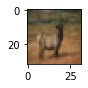

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

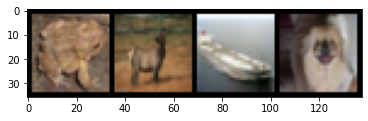

frog deer ship dog


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, (3,3), padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [ ]:
net = FirstCNN()

In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [ ]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


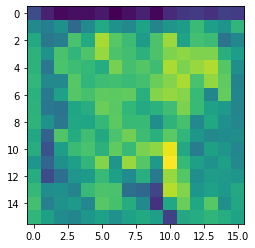

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [ ]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            #1st paramter is previous layer channel
            #2nd paramter is no of filters for current layer
            #3rd parameter is filter size of current layer
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

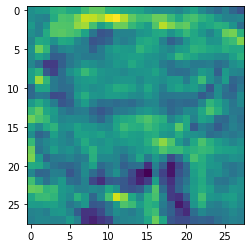

In [ ]:
plt.imshow(out[0, 4, :, :].detach().numpy())

In [ ]:
"""Formula for calculating output tensr shape"""
#Convolution layer = Ceiling(((Inputshape of the image - Filter size + 2 * padding)/Stride)+1))
#Pooling layer = Ceiling(((InputShape of image - Filter size)/Stride))+1 )

'Formula for calculating output tensr shape'

In [ ]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

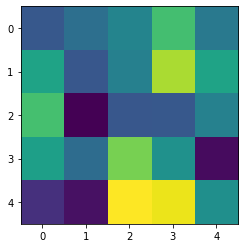

In [ ]:
plt.imshow(out[1, 1, :, :].detach().numpy())

## LeNet

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [ ]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)

tensor([[-0.0957,  0.0366, -0.0512, -0.0857, -0.0803, -0.0360, -0.1204, -0.0258,
         -0.0822,  0.0050],
        [-0.0971,  0.0370, -0.0543, -0.0814, -0.0835, -0.0367, -0.1184, -0.0150,
         -0.0820,  0.0067],
        [-0.1033,  0.0377, -0.0498, -0.0796, -0.1021, -0.0514, -0.1227, -0.0272,
         -0.0837,  0.0221],
        [-0.0947,  0.0350, -0.0579, -0.0885, -0.0906, -0.0363, -0.1180, -0.0245,
         -0.0792,  0.0033]], grad_fn=<AddmmBackward>)


In [ ]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([1, 1, 1, 1])


## Training LeNet

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet()

In [40]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.97, Train acc: 39.07
Epoch: 1/16, Test acc: 44.69, Train acc: 44.92
Epoch: 2/16, Test acc: 47.11, Train acc: 47.81
Epoch: 3/16, Test acc: 50.24, Train acc: 52.11
Epoch: 4/16, Test acc: 51.24, Train acc: 53.64
Epoch: 5/16, Test acc: 52.00, Train acc: 55.69
Epoch: 6/16, Test acc: 53.12, Train acc: 56.95
Epoch: 7/16, Test acc: 53.89, Train acc: 58.51
Epoch: 8/16, Test acc: 55.22, Train acc: 60.74
Epoch: 9/16, Test acc: 55.16, Train acc: 61.18
Epoch: 10/16, Test acc: 55.46, Train acc: 62.35
Epoch: 11/16, Test acc: 55.56, Train acc: 63.42
Epoch: 12/16, Test acc: 55.17, Train acc: 62.87
Epoch: 13/16, Test acc: 56.38, Train acc: 64.71
Epoch: 14/16, Test acc: 56.49, Train acc: 66.04
Epoch: 15/16, Test acc: 56.28, Train acc: 66.72


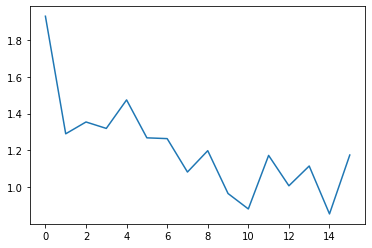

CPU times: user 6min 40s, sys: 3.21 s, total: 6min 43s
Wall time: 6min 43s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 31s, sys: 692 ms, total: 1min 32s
Wall time: 1min 32s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.22, Train acc: 64.16


## Basic Visualisation

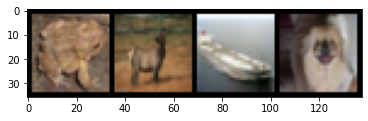

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
net = net.to('cpu')

In [ ]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [ ]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

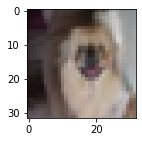

In [ ]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


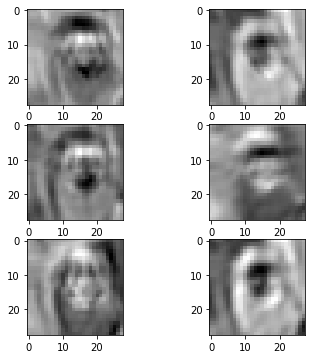

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.

In [ ]:
"""Implementing LeNet with Relu"""
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x


In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 31s, sys: 686 ms, total: 1min 32s
Wall time: 1min 32s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))
"""There is 3% lift in test accuracy which nice.Also we saved 4 seconds in runnings time :)"""

Test acc: 55.96, Train acc: 61.43


'There is 3% lift in test accuracy which nice.Also we saved 4 seconds in runnings time :)'

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),weight_decay=0.01)

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 32s, sys: 724 ms, total: 1min 33s
Wall time: 1min 33s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))
"""We are only getting a marginal improvement trying L2 regularization"""

Test acc: 48.98, Train acc: 49.07


'We are only getting a marginal improvement trying L2 regularization'

In [60]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, 
                                        download=True, 
                                        transform=transforms.ToTensor())

In [73]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [74]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=True)
"""We are setting batch size as 10"""

'We are setting batch size as 10'

In [75]:
testloader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False)

In [76]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([5, 1, 28, 28])
torch.Size([1, 28, 28])
0


In [77]:
classes = ('0','1','2','3','4','5','6','7','8','9') 

<class 'torch.Tensor'>
(1, 28, 28)
(28, 28, 1)


<Figure size 72x72 with 0 Axes>

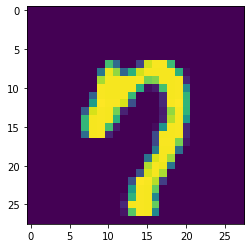

In [78]:
"""Displaying the image by converting tensor = > image => image squeeze and then display"""
img = images[3]
print(type(img))
npimg = img.numpy()
print(npimg.shape)
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)
npimg =  np.squeeze(npimg)
plt.figure(figsize = (1,1))
plt.figure()
plt.imshow(npimg)
plt.show()


In [79]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.squeeze(np.transpose(npimg, (1, 2, 0))))
    plt.show()

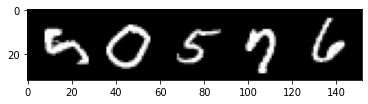

5  0  5  7  6


In [80]:
imshow(torchvision.utils.make_grid(images))
print('  '.join(classes[labels[j]] for j in range(5)))

In [83]:
import torch.nn as nn
"""Implementing Convolutional neural network for Mnist"""
class Mnistv1(nn.Module):
    def __init__(self): 
        super(Mnistv1, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) -> (N, 6, 24, 24)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) -> (N,  6, 12, 12)
            nn.Conv2d(6, 16, 5),        # (N, 6, 12, 12) -> (N, 16, 8, 8)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2))   # (N,16, 8, 8) -> (N, 16, 4, 4)
        
        self.fc_model = nn.Sequential(
            nn.Linear(256,128),         # (N, 256) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128,64),          # (N, 128) -> (N, 64)
            nn.ReLU(),
            nn.Linear(64,10)           # (N, 64) -> (N, 10)
                            )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

















In [84]:
net = Mnistv1().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),weight_decay=0.01)

In [85]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 11min 41s, sys: 8.92 s, total: 11min 50s
Wall time: 11min 55s


In [87]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))
"""Not a bad achievement considering the fact that we created the network from scratch"""


Test acc: 95.54, Train acc: 95.17


'Not a bad achievement considering the fact that we created the network from scratch'